# DYNAMIC PRICE OPTIMIZATION FOR E-COMMERCE 

# Importing required libraries

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Importing the dataset

In [71]:
file_path = '/Users/abhignatanguturi/Desktop/myprojects/Dynamic_Pricing_ecommerce/ecommercedata.csv'
data = pd.read_csv(file_path)

In [72]:
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [73]:
data.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

# Data Preprocessing

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Handle missing values
data.fillna(0, inplace=True)  # Replace NaN with 0, adapt based on your dataset

# Convert categorical variables if needed
# e.g., data = pd.get_dummies(data, columns=['Mode_of_Shipment', 'Product_importance', 'Gender'])

# Split data into features and target variable
X = data[['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Weight_in_gms']]
y = data['Discount_offered']



# Visulizing the data

# Pair Plot

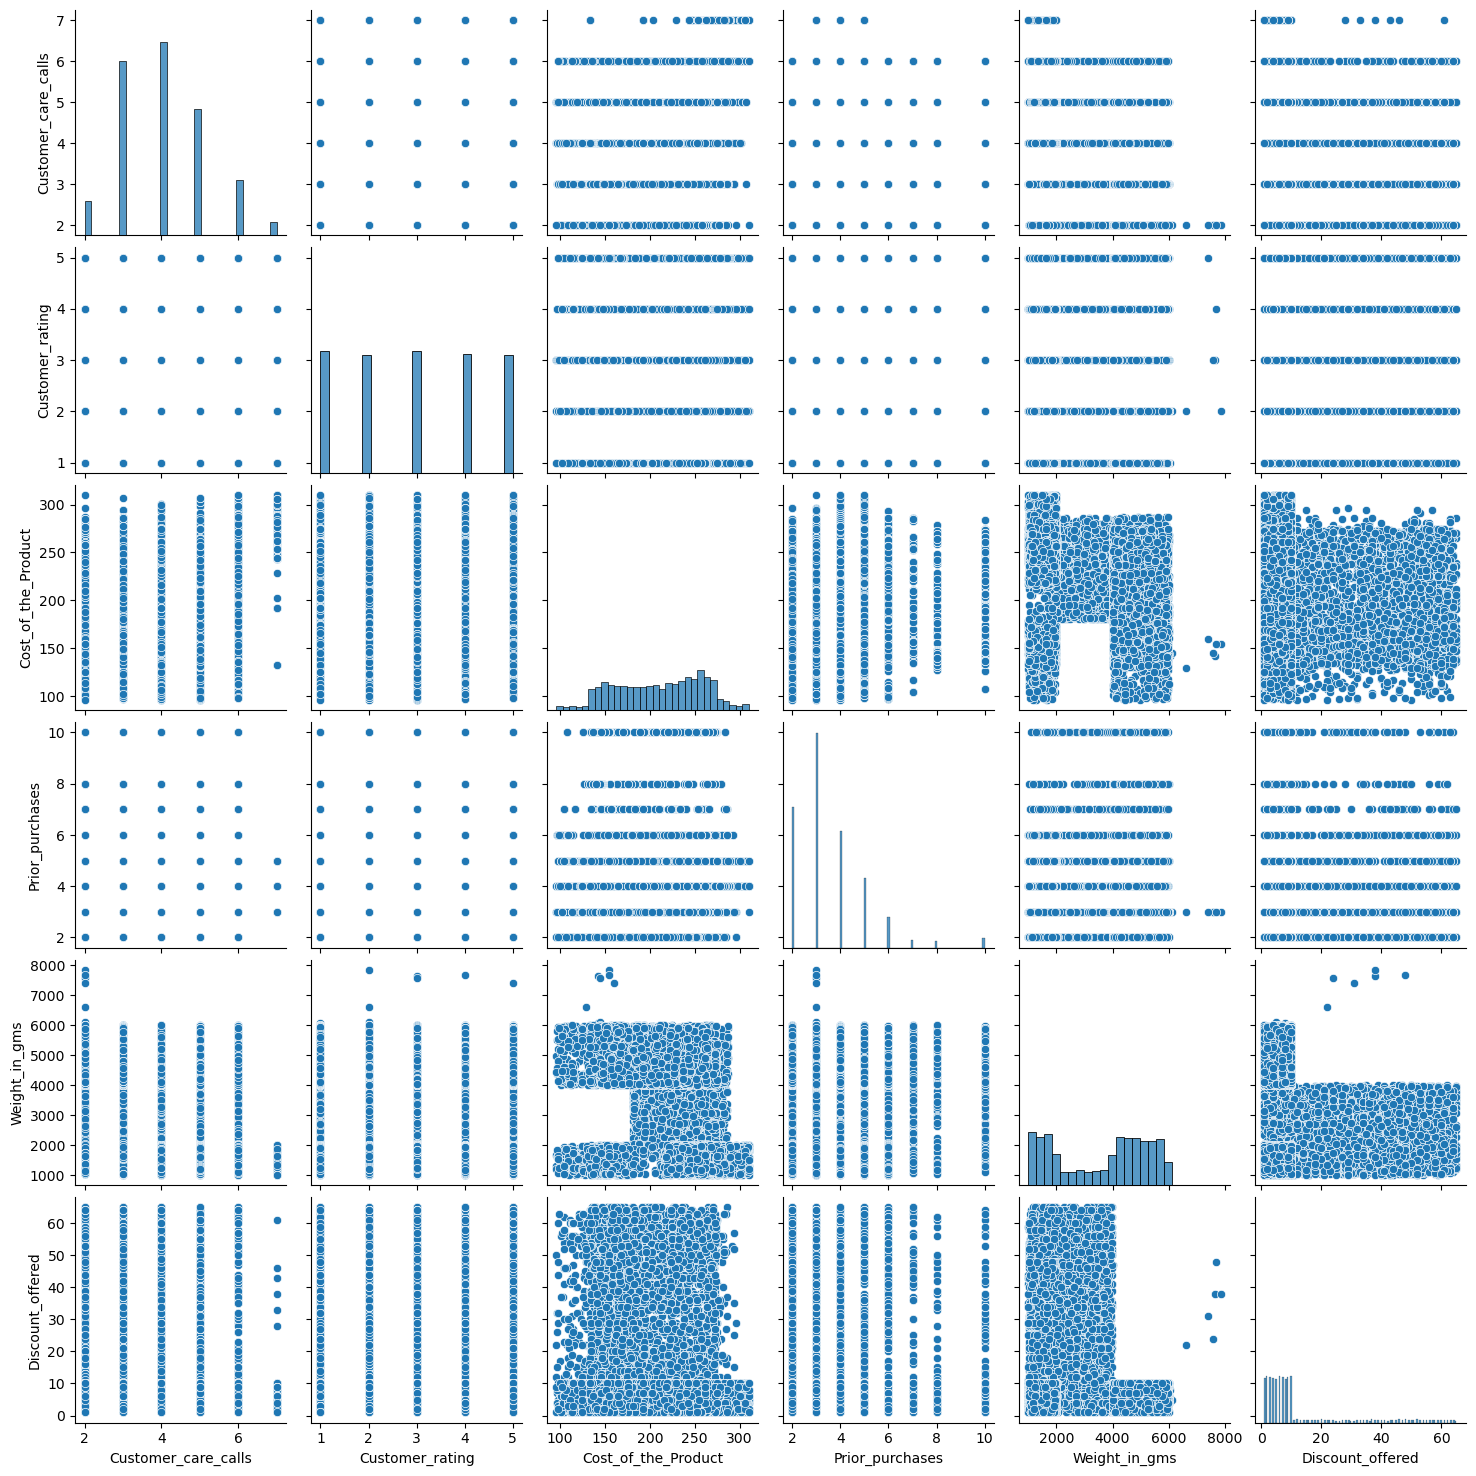

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset of features for pair plot
pair_plot_data = data[['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Weight_in_gms', 'Discount_offered']]

# Create pair plot
sns.pairplot(pair_plot_data)
plt.show()


# Correlation Heatmap

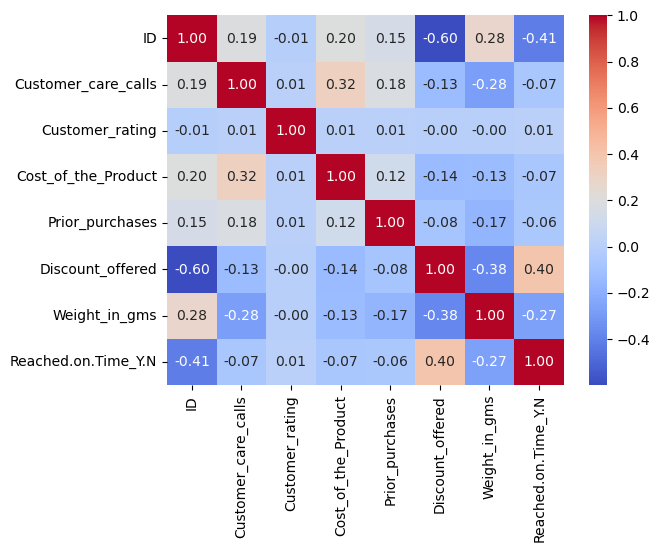

In [76]:
# Calculate correlation matrix with numeric_only set to True
correlation_matrix = data.corr(numeric_only=True)

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


# Histograms

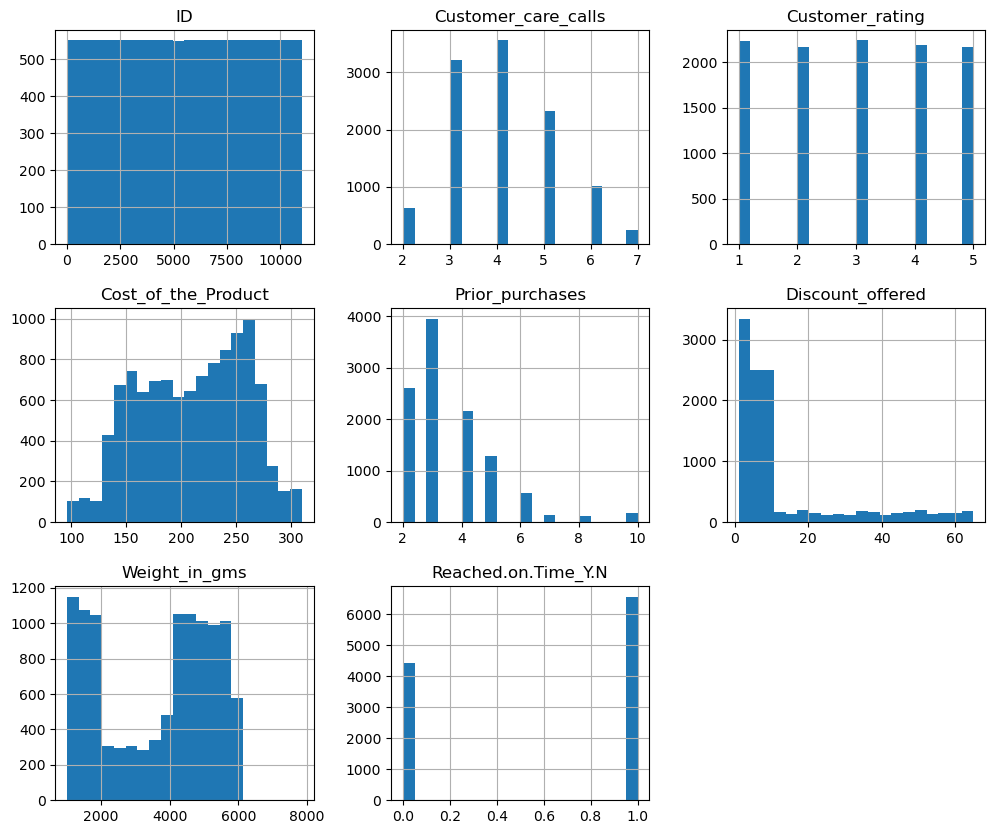

In [77]:
# Create histograms
data.hist(figsize=(12, 10), bins=20)
plt.show()


# Boxplot

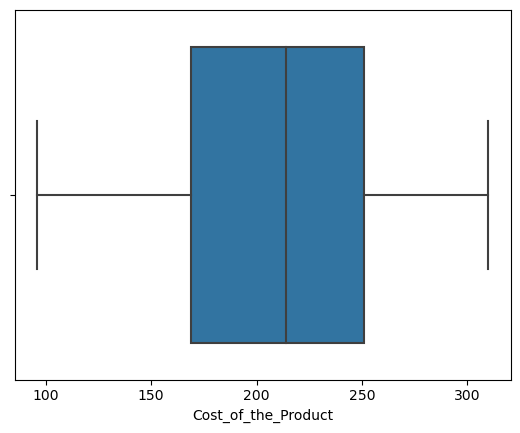

In [78]:
# Create boxplot for 'Cost_of_the_Product'
sns.boxplot(x='Cost_of_the_Product', data=data)
plt.show()


# Countplot

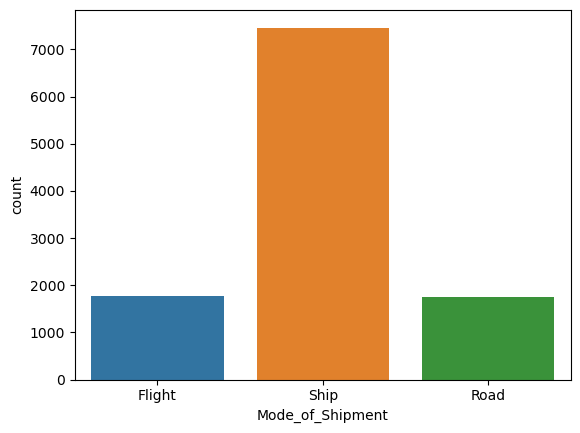

In [79]:
# Create countplot for 'Mode_of_Shipment'
sns.countplot(x='Mode_of_Shipment', data=data)
plt.show()


# Splitting the data into training and testing sets

In [80]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Feature scaling

In [81]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()


# Hyperparameter Tuning with Grid Search

In [83]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2]
}

svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_scaled)


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.2],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='neg_mean_squared_error')

# Plot for Grid Search

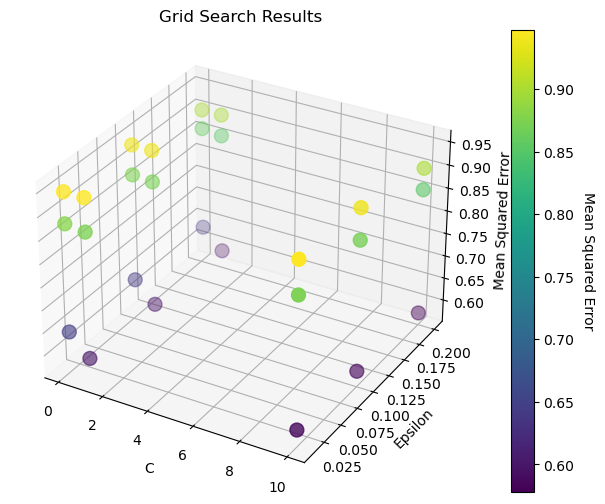

In [90]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV

# Assuming 'grid_search' is your GridSearchCV object

# Extract relevant information from the grid search results
params = grid_search.cv_results_['params']
mean_scores = -grid_search.cv_results_['mean_test_score']

# Create a scatter plot for each combination of hyperparameters
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Extract values of hyperparameters
C_values = [param['C'] for param in params]
epsilon_values = [param['epsilon'] for param in params]
kernel_values = [param['kernel'] for param in params]

# Plotting
sc = ax.scatter(C_values, epsilon_values, mean_scores, c=mean_scores, cmap='viridis', s=100)
ax.set_xlabel('C')
ax.set_ylabel('Epsilon')
ax.set_zlabel('Mean Squared Error')
ax.set_title('Grid Search')

# Adding colorbar
cbar = fig.colorbar(sc)
cbar.set_label('Mean Squared Error', rotation=270, labelpad=15)

plt.show()


In [84]:
# Best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')


Best Hyperparameters: {'C': 10, 'epsilon': 0.2, 'kernel': 'rbf'}


# Model Training Using SVR

In [85]:
svr_model = SVR(kernel='linear', C=1.0)
svr_model.fit(X_train_scaled, y_train_scaled)

SVR(kernel='linear')

# Model Evaluation

In [86]:
X_test_scaled = scaler_X.transform(X_test)
y_test_pred_scaled = svr_model.predict(X_test_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

In [87]:
mse = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 239.55494452342577


# Line plot for actual vs. predicted values

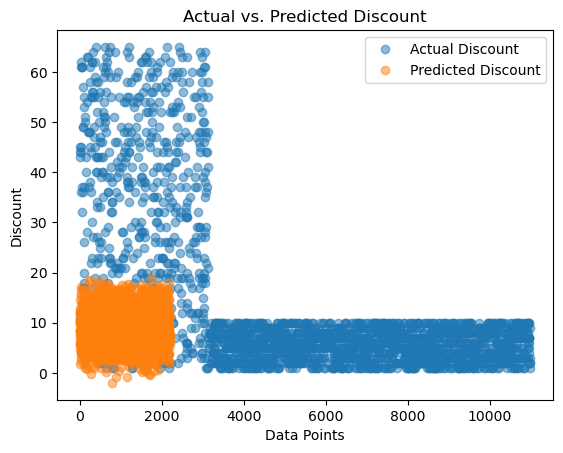

In [88]:
plt.plot(y_test, label='Actual Discount', marker='o', linestyle='', alpha=0.5)
plt.plot(y_test_pred, label='Predicted Discount', marker='o', linestyle='', alpha=0.5)
plt.xlabel('Data Points')
plt.ylabel('Discount')
plt.title('Actual vs. Predicted Discount')
plt.legend()
plt.show()

# Actual vs Predicted values

In [100]:
# Assuming percentages are in the range [0, 100]
max_percentage = 100

# Convert percentages to the range [0, 1] for printing
y_test_percentage = y_test.iloc[indices] / max_percentage
y_test_pred_percentage = y_test_pred[indices] / max_percentage

# Set the print options to display percentages consistently
np.set_printoptions(formatter={'float': '{:.2%}'.format})

# Print actual vs. predicted percentages
print("Actual Percentages:")
print(y_test_percentage.values)

print("\nPredicted Percentages:")
print(y_test_pred_percentage)


Actual Percentages:
[10.00% 9.00% 6.00% 27.00% 7.00% 8.00% 10.00% 7.00% 3.00% 6.00%]

Predicted Percentages:
[5.97% 4.14% 3.91% 10.33% 7.49% 5.94% 11.63% 3.58% 7.12% 10.30%]


# Accuracy

In [98]:
# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Calculate MAPE for the selected data points
mape = calculate_mape(y_test_percentage.values, y_test_pred_percentage)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Calculate accuracy as the percentage of correct predictions
accuracy = 100 - np.mean(np.abs(y_test_percentage.values - y_test_pred_percentage) * 100)
print(f"Accuracy: {accuracy:.2f}%")

Mean Absolute Percentage Error (MAPE): 49.78%
Accuracy: 95.63%


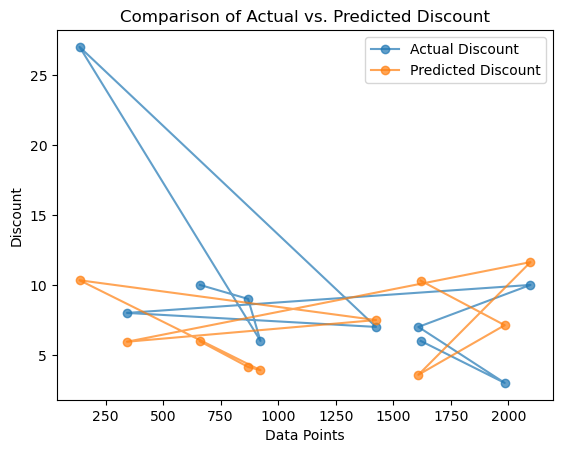

In [94]:
# Line plot for a comparison of randomly selected actual and predicted values
plt.plot(indices, y_test.iloc[indices], marker='o', label='Actual Discount', linestyle='-', alpha=0.7)
plt.plot(indices, y_test_pred[indices], marker='o', label='Predicted Discount', linestyle='-', alpha=0.7)
plt.xlabel('Data Points')
plt.ylabel('Discount')
plt.title('Comparison of Actual vs. Predicted Discount')
plt.legend()
plt.show()

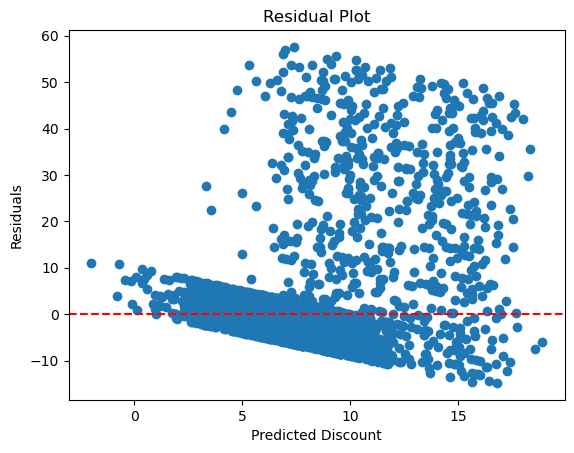

In [61]:
# Residual plot to check for homoscedasticity
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals)
plt.xlabel('Predicted Discount')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [62]:
# Price Optimization
# Example: Predict the discount for a new set of features
new_data = pd.DataFrame({
    'Customer_care_calls': [3],
    'Customer_rating': [4],
    'Cost_of_the_Product': [80],
    'Prior_purchases': [2],
    'Weight_in_gms': [1500]
})

print("\nExample data for price optimization:")
print(new_data)

new_data_scaled = scaler_X.transform(new_data)
predicted_discount_scaled = svr_model.predict(new_data_scaled)
predicted_discount = scaler_y.inverse_transform(predicted_discount_scaled.reshape(-1, 1)).ravel()[0]

print(f'Predicted Discount: {predicted_discount}')


Example data for price optimization:
   Customer_care_calls  Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    3                4                   80                2   

   Weight_in_gms  
0           1500  
Predicted Discount: 18.080446223898118
